In [129]:
import os
import sklearn
import pandas as pd
import numpy as np
from numpy import matmul
import matplotlib
from matplotlib import pyplot as plt
from DEC import for_all_files
from sklearn import decomposition, cluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors.kde import KernelDensity

%matplotlib inline

In [419]:
# test preparation
test_file = './test data/20111129.csv'
test_df = pd.read_csv(test_file)

In [420]:
test_df.head()

,25248785,330841128,0,9,5,9.1,3,5.1,2,6,...,2.9,9.6,7.5,9.7,13.2,6.12,17,8.6,8.7,8.8
0,25248785,2424906809,1,16,20,17,24,20,16,14,...,28,22,17,24,27,23,38,24,24,22
1,25248786,25248785,2,23,26,25,29,25,19,18,...,29,29,25,32,40,31,53,33,31,32
2,25248787,1446052195,3,3,1,2,1,0,1,0,...,0,2,1,1,1,0,0,0,0,2
3,25248787,25248786,4,24,25,21,25,24,17,18,...,28,24,25,27,39,25,48,29,32,24
4,25248788,1891268439,5,8,6,8,3,6,2,5,...,3,9,6,9,8,6,12,6,8,6


In [421]:
def pre_process(df):
    to_drop = ['25248785', '330841128', '0']
    df.drop(to_drop, axis=1, inplace=True)
    names = [i for i in range(1, 97)]
    rename_mapping = {}
    for i, name in enumerate(df.columns.values):
        rename_mapping[name] = i + 1
    df.rename(rename_mapping, axis=1, inplace=True)
    return df

In [422]:
test_df = pre_process(test_df)

In [423]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,16,20,17,24,20,16,14,10,15,4,...,28,22,17,24,27,23,38,24,24,22
1,23,26,25,29,25,19,18,14,20,7,...,29,29,25,32,40,31,53,33,31,32
2,3,1,2,1,0,1,0,0,0,1,...,0,2,1,1,1,0,0,0,0,2
3,24,25,21,25,24,17,18,13,18,7,...,28,24,25,27,39,25,48,29,32,24
4,8,6,8,3,6,2,5,4,4,3,...,3,9,6,9,8,6,12,6,8,6


In [427]:
nmf_test = decomposition.NMF(n_components=n_nmf_features, max_iter=max_nmf_iter)
X_test = nmf_test.fit_transform(test_df)
patterns_test = nmf_test.components_

(127048, 3)

In [40]:
df = pd.read_csv('./train.csv', index_col=0)

In [41]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,16,15,26,25,29,21,15,17,7,12,...,15,20,23,32,19,33,35,25,23,20
1,26,25,38,29,36,30,19,19,9,15,...,27,29,28,42,28,42,38,46,30,28
2,1,1,3,1,1,1,1,1,1,2,...,1,1,2,1,0,0,0,0,0,0
3,20,21,38,26,31,27,14,19,9,11,...,22,27,21,41,22,30,37,39,24,29
4,7,6,5,6,7,7,4,2,2,2,...,9,11,5,7,5,5,2,11,4,8


In [327]:
df.shape

(1143432, 96)

In [329]:
size = df.shape[0] // 9
print (size)

127048


In [20]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,16,15,26,25,29,21,15,17,7,12,...,15,20,23,32,19,33,35,25,23,20
1,26,25,38,29,36,30,19,19,9,15,...,27,29,28,42,28,42,38,46,30,28
2,1,1,3,1,1,1,1,1,1,2,...,1,1,2,1,0,0,0,0,0,0
3,20,21,38,26,31,27,14,19,9,11,...,22,27,21,41,22,30,37,39,24,29
4,7,6,5,6,7,7,4,2,2,2,...,9,11,5,7,5,5,2,11,4,8


In [430]:
# training parameters
n_roads = df.shape[0]
n_times = df.shape[1]
train_days = 9
n_nmf_features = 3
max_nmf_iter = 1000
n_clusters = 10
max_cluster_iter = 300
threshold = 1e-5

In [81]:
# nmf = decomposition.nmf(n_components=n_nmf_features, max_iter=max_nmf_iter)
# X = nfm.fit_transform(df)
# patterns = nmf.components_
X = pd.read_csv('./parameter_matrix.csv', index_col=0)
patterns = pd.read_csv("./pattern_matrix.csv", index_col=0)

In [105]:
X.shape

(1143432, 3)

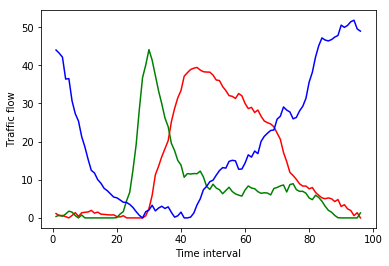

In [23]:
times = [i for i in range(1, n_times + 1)]
plt.xlabel("Time interval")
plt.ylabel("Traffic flow")
for pattern, color in zip(patterns, ['r', 'g', 'b']):
    plt.plot(times, pattern, color)

In [116]:
# classes = cluster.KMeans(X)
classes = pd.read_csv('./classes_KMeans_10.csv', index_col=0)

/Users/yingjiejiang/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [117]:
classes.head()

,0
0,2
1,7
2,0
3,7
4,4


[0, 1, 2]

In [220]:
# starting from here
class_mapper = {i: set() for i in range(n_clusters)}

In [224]:
for i in range(X.shape[0]):
    rest = X.shape[0] // 100
    if i % rest == 0:
        print (i)
    class_mapper[classes.iloc[i][0]].add(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000


In [254]:
def get_neighbors(x):
    for i in range(n_clusters):
        if x in class_mapper[i]:
            return class_mapper[i];

In [255]:
get_neighbors(0)

{0,
 6,
 10,
 17,
 19,
 20,
 131091,
 22,
 23,
 1094170,
 131098,
 27,
 131109,
 131110,
 131111,
 131116,
 131117,
 131118,
 524332,
 524336,
 49,
 524337,
 655406,
 524340,
 131126,
 131127,
 131128,
 131129,
 524342,
 131131,
 131132,
 655416,
 655418,
 131135,
 655420,
 65,
 66,
 131137,
 131138,
 69,
 393284,
 71,
 73,
 1048650,
 75,
 76,
 393296,
 393304,
 393305,
 90,
 393307,
 92,
 393309,
 393310,
 393311,
 393312,
 99,
 101,
 102,
 262245,
 262249,
 1048688,
 262272,
 262277,
 262278,
 262279,
 262280,
 262281,
 145,
 146,
 147,
 262289,
 149,
 262290,
 159,
 170,
 786606,
 262320,
 262322,
 262323,
 393395,
 262325,
 393401,
 187,
 188,
 189,
 190,
 191,
 198,
 1048785,
 262355,
 262363,
 262364,
 262365,
 262367,
 262368,
 131304,
 233,
 1048811,
 262380,
 262381,
 262383,
 131312,
 262384,
 262385,
 262386,
 262387,
 393456,
 131323,
 131324,
 262395,
 254,
 131327,
 937907,
 1048831,
 1048850,
 131347,
 131348,
 262419,
 131350,
 131351,
 131352,
 262420,
 262424,
 104885

In [204]:
def get_coord(x):
    return [X.iloc[x][i] for i in range(n_nmf_features)]

In [205]:
# get_coord(0)

(0.3739824221002824, 0.09871265243270556, 0.4766766658333809)

In [206]:
class_coord_mapper = {i: set() for i in range(n_clusters)}

In [209]:
for i in range(classes.shape[0]):
    rest = classes.shape[0] // 100
    if i % rest == 0:
        print (i)
    class_coord_mapper[classes.iloc[i][0]].add(tuple(get_coord(i)))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000


In [227]:
def get_neighbors_coord(x):
    for i in range(n_clusters):
        if x in class_mapper[i]:
            return class_coord_mapper[i]

In [238]:
# print (list(get_neighbors_coord(0)))

[(0.4030055009199452, 0.051397959684307416, 0.30964823527116936), (0.2822900028788128, 0.21290248949588308, 0.21231260010871045), (0.2856981654751241, 0.06640121760521747, 0.3653482317310857), (0.37732815885035603, 0.1879855209609777, 0.22273173820650474), (0.3928521937831076, 0.07734602005555252, 0.2474254442226748), (0.2783413907389655, 0.1375771259315751, 0.35323423181067204), (0.3383063203884843, 0.048357631209320656, 0.19495913458900688), (0.3701410944632322, 0.14730718807037582, 0.3798889910091485), (0.34303986095393657, 0.08265047334880612, 0.4235494590523667), (0.4836602348101695, 0.0336392765242067, 0.2193428989198532), (0.31442115538451554, 0.0988087566724945, 0.19611738027798306), (0.3465465398077818, 0.1463746918606743, 0.2230150495106716), (0.4862634384163222, 0.09506808056188504, 0.26908175217622743), (0.34359209683732, 0.033754684410996036, 0.316345637679848), (0.3448932648502358, 0.10961603349574044, 0.25087243577762874), (0.5237409682501644, 0.10990078367885324, 0.2714

In [249]:
def get_traffic(x, t):
    return df.iloc[x][t]

In [263]:
def get_neighbors_traffic(x, t):
    neighbors = list(get_neighbors(x))
    traffic = []
    for n in neighbors:
        traffic.append([df.iloc[n][t]])
    
    return traffic

In [314]:
# kde = KernelDensity(kernel='gaussian').fit(get_neighbors_traffic(3, 9))

0.9841886297460398


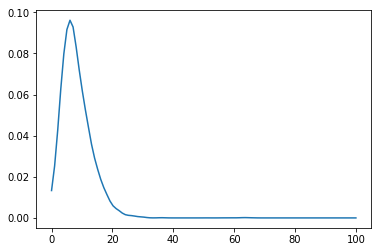

In [316]:
# X_plot = np.linspace(0, 100, 100)[:, np.newaxis]
# score = kde.score_samples(X_plot)
# tot_score = 0
# for i, x in enumerate(X_plot):
#     tot_score += np.exp(score[i])
# print (tot_score)
# plt.plot(X_plot, np.exp(score))

In [451]:
def get_neighbor_prob(traffic, x, t, delta):
    kde = KernelDensity(kernel='gaussian').fit(get_neighbors_traffic(x, t))
    # traffic = df.iloc[x][t]
    interval = np.linspace(traffic - delta, traffic + delta + 1, 2 * delta + 1)[:, np.newaxis]
    score = kde.score_samples(interval)
    prob = 0
    for i in range(2 * delta + 1):
        prob += np.exp(score[i])
    return prob

0.3958333333333333

In [368]:
def get_historic_traffic(x, t):
    traffic = []
    i = x
    while (i < df.shape[0]):
        traffic.append(df.iloc[i][t])
        i += size
    
    return traffic

In [450]:
def get_historic_prob(traffic, x, t, delta):
    h_traffic = get_historic_traffic(x, t)
    # traffic = target.iloc[x][t]
    count = 0
    result = 0
    for i in range(9): # 9=9days
        count += h_traffic[i] >= traffic - delta and h_traffic[i] <= traffic + delta
    
    return count / 9

In [384]:
# get_historic_prob(0, 2, 0)

0.1111111111111111

In [453]:
def get_overall_score(x, t, delta1, delta2, beta):
    return (1 - beta) * get_neighbor_prob(test_df.iloc[x][t], x, t, delta1) + beta * get_historic_prob(test_df.iloc[x][t], x, t, delta2)

In [469]:
# get_overall_score(4, 95, 1, 0, 0.5)

96

In [470]:
def get_n_single_road_accidents(x, delta1, delta2, beta):
    n_accidents = 0
    for t in range(1, n_times + 1, 4):
        print ("    t:", t)
        n_accidents += get_overall_score(x, t, delta1, delta2, beta) > threshold
    
    return n_accidents

In [471]:
def get_n_total_roads_accidents(delta1, delta2, beta):
    rest = n_roads // 100
    n_total_roads_accidents = 0
    r = 0
    while r < n_roads:
        print ("r:", r)
        n_total_roads_accidents += get_n_single_road_accidents(r, delta1, delta2, beta)
        r += n_roads // 10
    
    return n_total_roads_accidents

In [472]:
result = get_n_total_roads_accidents(0, 0, 0.5)

r: 0
    t: 1
    t: 5
    t: 9
    t: 13
    t: 17
    t: 21
    t: 25
    t: 29
    t: 33
    t: 37
    t: 41
    t: 45
    t: 49
    t: 53
    t: 57
    t: 61
    t: 65
    t: 69
    t: 73


KeyboardInterrupt: 